##### Importing the packages we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

##### Reading in the csv file 

In [2]:
salary = pd.read_csv('salary.csv')

In [3]:
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


##### Inspecting the dataframe to locate any missing values

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


##### There is one missing value in the salary column. We could either drop the missing value or replace it with the median of the salary. In this case, we will replace the missing value with the median because it is a small dataset. 

In [5]:
salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [6]:
salary_median = salary.median()

In [7]:
salary.fillna(salary_median,inplace=True)

In [8]:
salary.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

##### We will now use a pairplot to see the relationships between different values as well as to see which variables have continuous values.

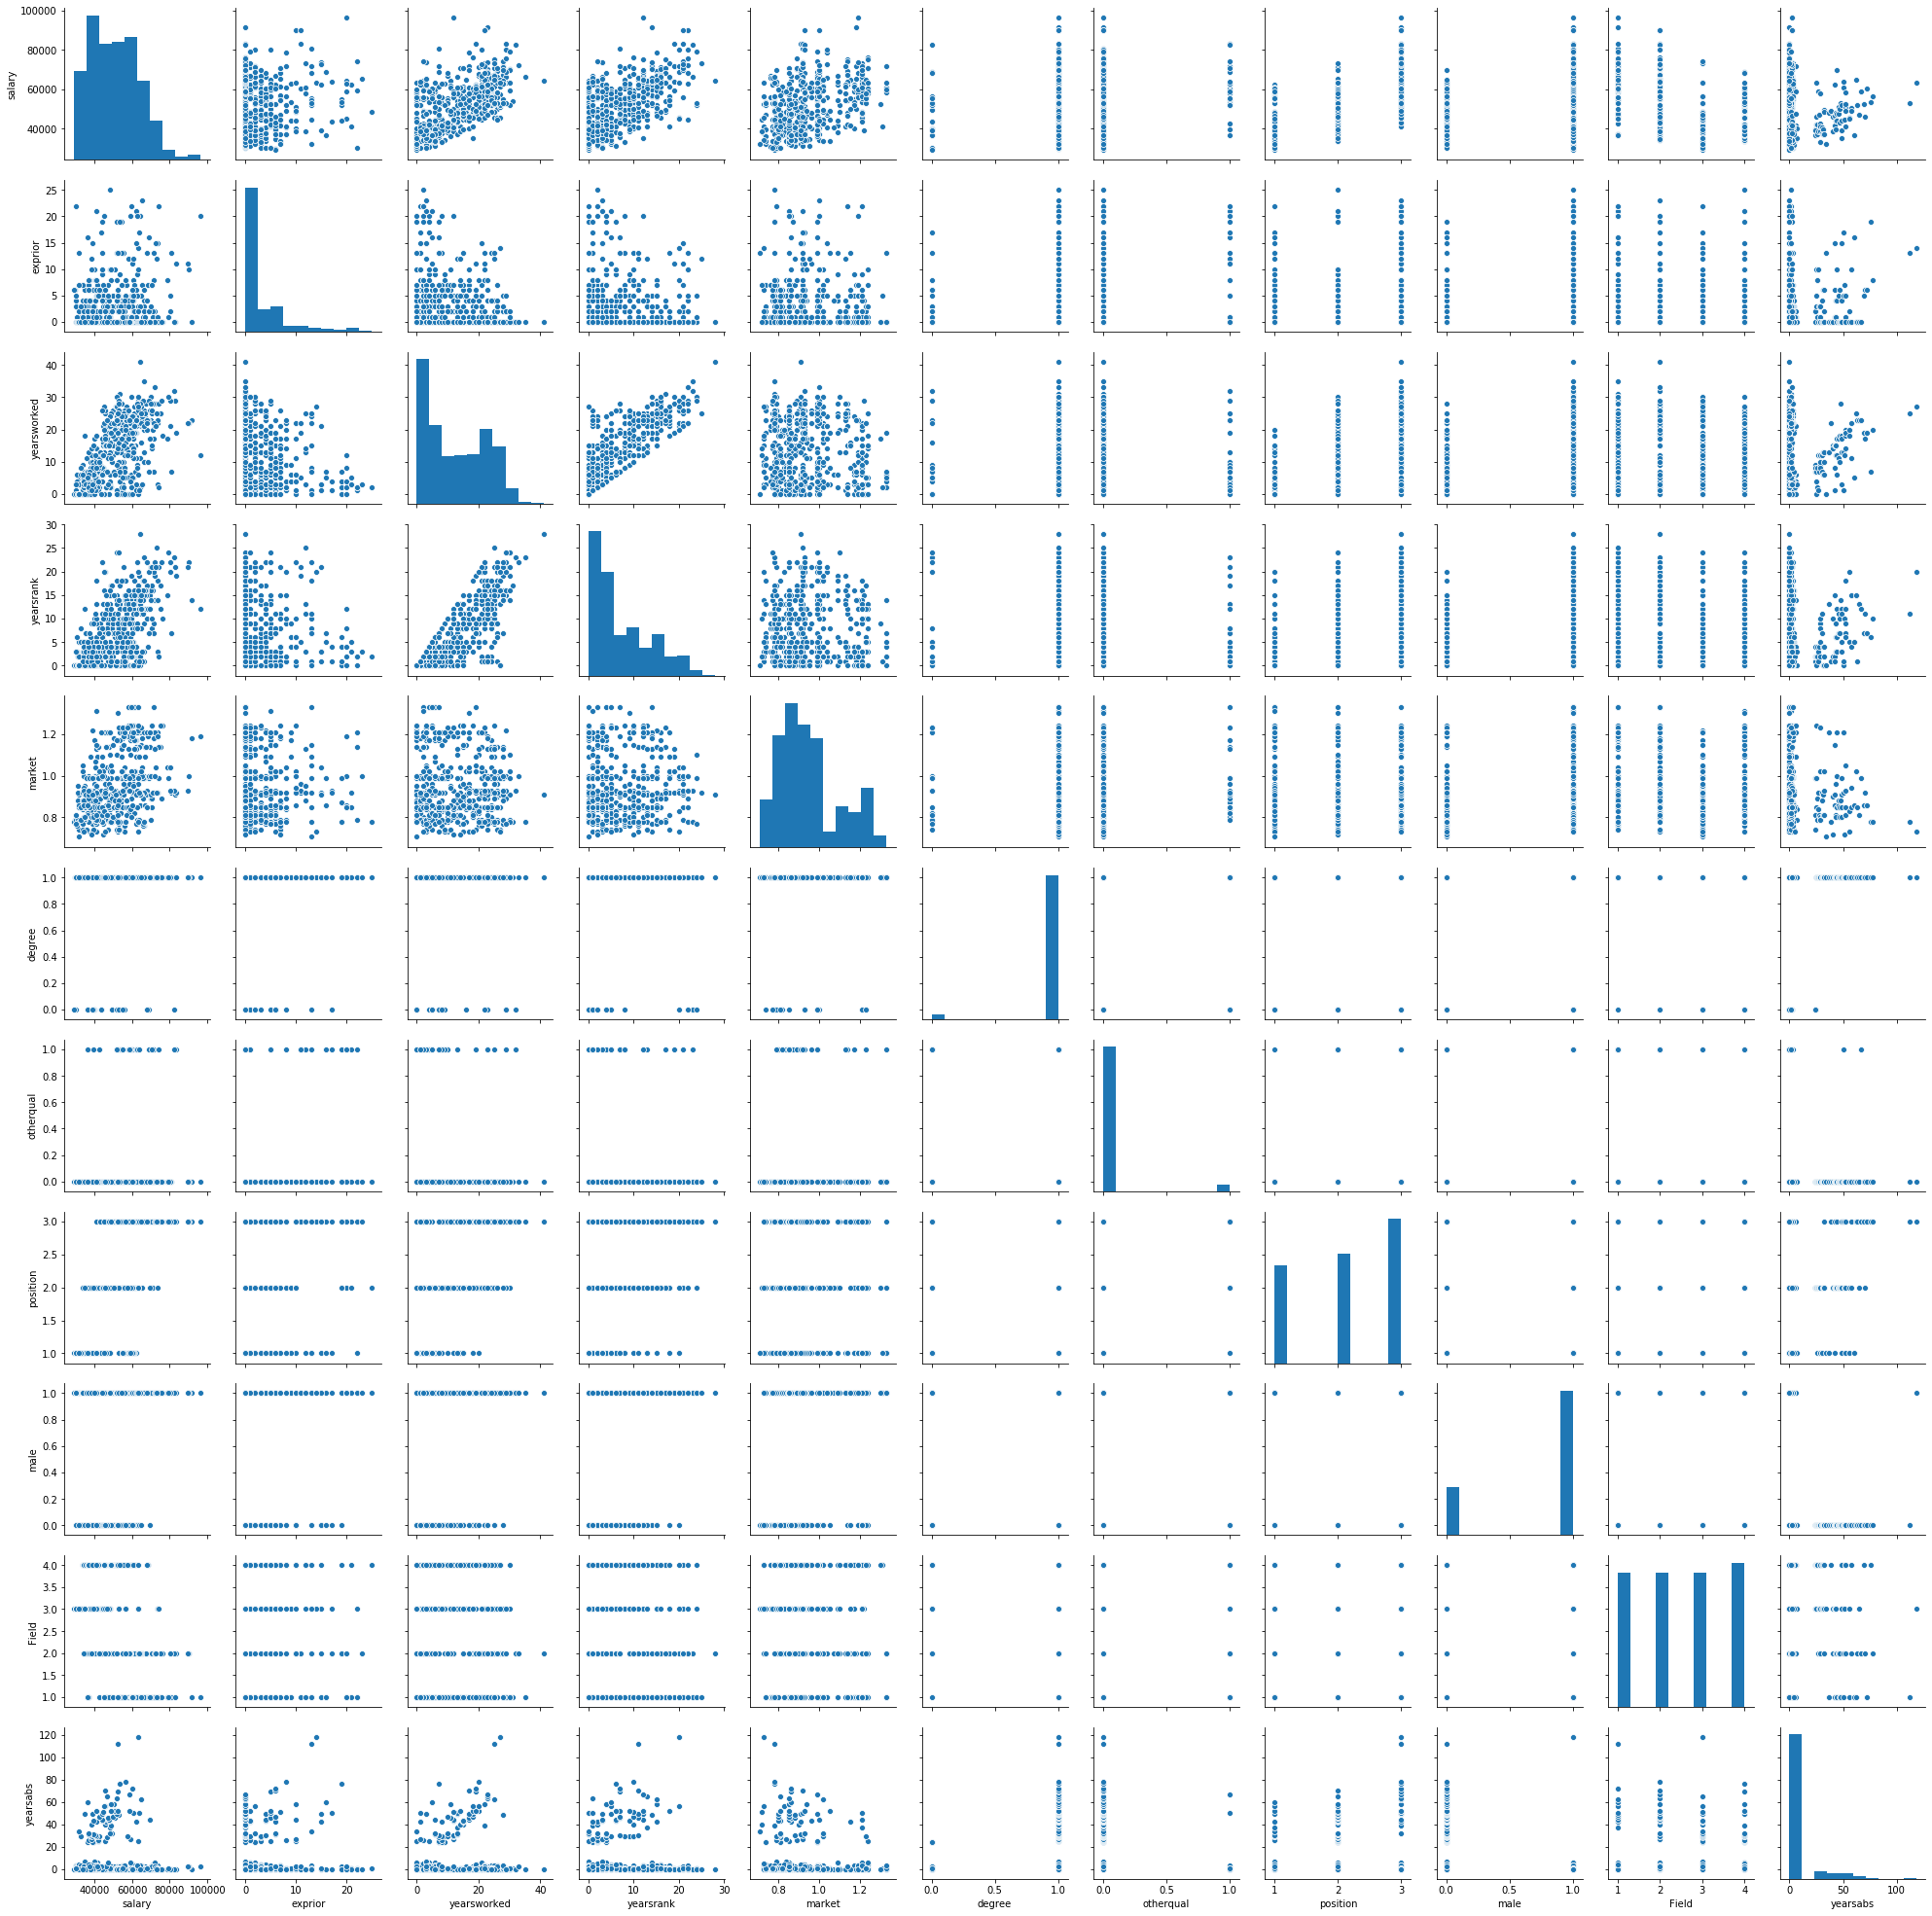

In [9]:
sns.pairplot(salary)

In [10]:
salary.columns

Index(['salary', 'exprior', 'yearsworked', 'yearsrank', 'market', 'degree',
       'otherqual', 'position', 'male', 'Field', 'yearsabs'],
      dtype='object')

##### The null hypothesis states that there are no variables suitable to be used for modeling. There are no correlations between the target variable and other variables, the target variable being salary.

In [11]:
salary.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.120017,0.623031,0.610524,0.407221,0.044530,0.167154,0.701226,0.361378,-0.498638,-0.069580
exprior,0.120017,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.623031,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610524,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.407221,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044530,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.167154,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.701226,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.361378,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.498638,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


##### Upon inspection, we see that there is a correlation with three variables. The highest correlation is between salary and position. However, we cannot use the position for predicting because it is not a continuous value. Therefore we will use the yearsworked variables because it has the second-highest correlation of 0.62 and it is a continuous value. This observation disproves the null hypothesis and causes us to accept the alternative hypothesis.



##### We will now define the variables yearsworked and salary as variables X and y to split them into the train and test sets.

In [12]:
X = salary[['yearsworked']]
y = salary['salary']

##### Splitting the dataset into the train set and test set. 70% of the data will go into the training set and the remaining 30% will be used for testing.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
faze = ['exprior','yearsworked','yearsrank','market','degree','otherqual','position','male','Field','yearsabs']

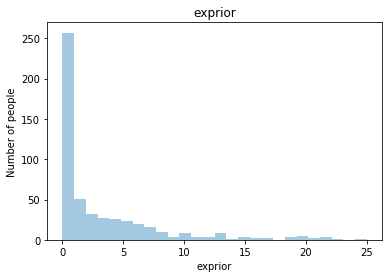

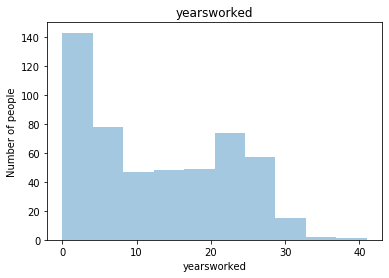

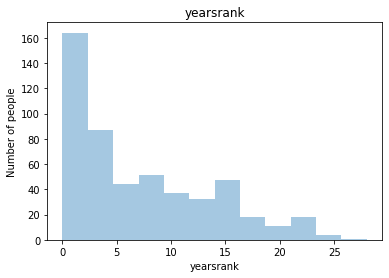

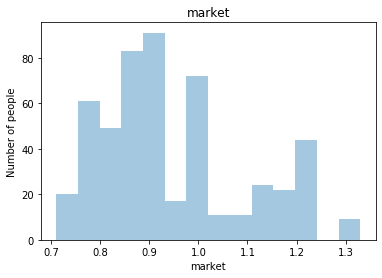

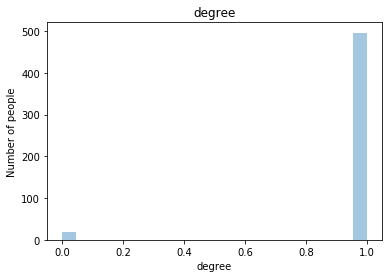

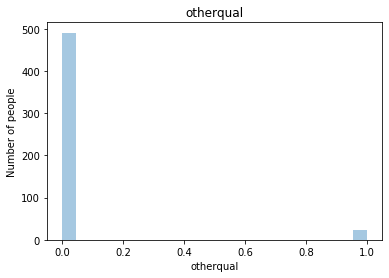

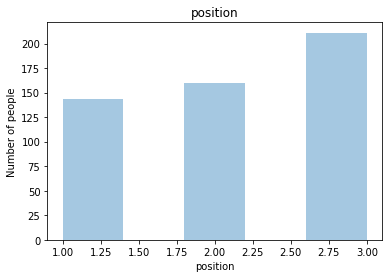

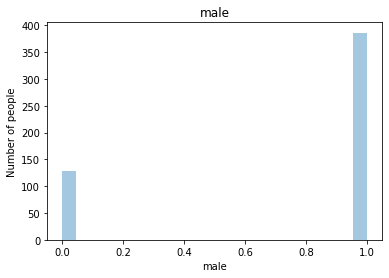

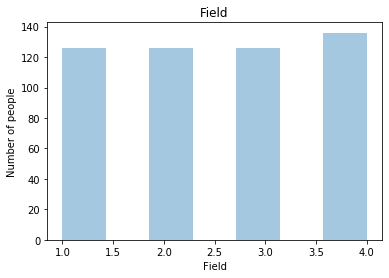

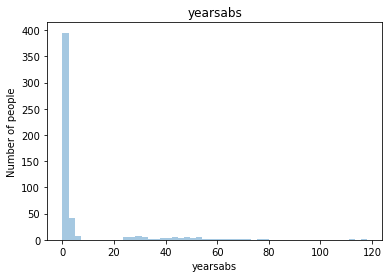

In [15]:
for i in faze:
    sns.distplot(salary[i],kde=False)
    plt.title(f'{i}')
    plt.ylabel('Number of people')
    plt.show()

In [16]:
salary.fillna(salary_median,inplace=True)

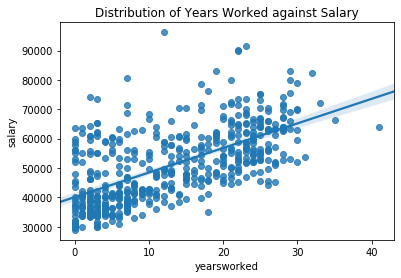

In [17]:
sns.regplot(salary['yearsworked'],salary['salary'])
plt.title('Distribution of Years Worked against Salary')
plt.show()

##### The variables with a high correlation with salary are 'position', 'yearsworked' and 'yearsrank'. Position does not have continuous values so it will not be used for modeling. Of the two variables left 'yearsworked' has the highest correlation with continuous values so it will be used for modeling.

In [18]:
stats.pearsonr(salary['salary'], salary['yearsworked'])

(0.6230314515861766, 1.3460675831185684e-56)

##### The correlation betwewen salary and yearsworked is 0.62 .The p-value is 1.34 e-56. This tells us that this correlation is statistically significant.

##### Creating the model using statsmodels

In [19]:
prediction = sm.OLS(y_train, X_train).fit()                                                                                          

##### Predicting the salary of someone who has worked for 12 years.

In [20]:
prediction.predict([[12]])

array([34543.7483207])

##### The salary of someone who has worked for 12 years is likely to be R34 543.75

In [21]:
prediction.predict([[80]])

array([230291.65547132])

##### The salary of someone who has worked for 80 years is likely to be R230 291.66

In [22]:
prediction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              1021.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):                   6.68e-107
Time:                        09:42:32   Log-Likelihood:                         -4165.4
No. Observations:                 359   AIC:                                      8333.
Df Residuals:                     358   BIC:                                      8337.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2878.6457     90.068     31.961      0.000    2701.517    3055.775
==============================================================================
Omnibus:                        9.411   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.854
Skew:                          -0.145   Prob(JB):                       0.0536
Kurtosis:                       2.445   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####  The R squared value tells the quality of the regression model describing relationships between dependent and independent variables in a model. The R squared value for this model is 0.740 so the model is approximately 74% accurate. The p-value of this model is 0.000 so it is statistically significant.

##### The confidence interval is an estimate interval that might contain the value of the unstandardized coefficient. In this model, the coefficient is 2873.7982. This means that for every unit, there will be an increase of 2873.7982.

#### Plotting a scatter plot for the train data set against the prediction model

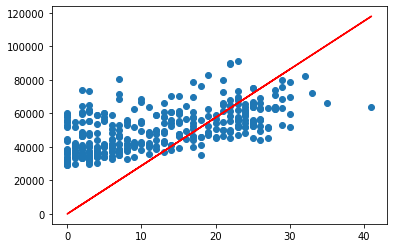

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_train,prediction.predict(X_train),color='red')

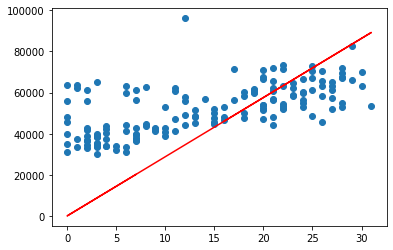

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_test,prediction.predict(X_test),color='red')

In [25]:
model = sm.OLS(y_test, X_test).fit()

In [26]:
model.predict([12])

array([34031.03599408])

In [27]:
model.predict([80])

array([226873.57329387])

In [28]:
salary['salary'].max()

96156.0

In [29]:
model.predict(41)

array([116272.70631311])

In [30]:
from sklearn import metrics

In [31]:
print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, prediction.predict(X_train))))
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction.predict(X_test))))

TRAIN RMSE: 26470.17911815414
TEST RMSE: 23910.210918513818


##### Train RMSE is higher than Test RMSE. This means that we did not overfit the model during the training phase.

##### We are required to look at other characteristics that might influence an employee's salary. The only other factor that correlated with salary is yearsrank. The new null hypothesis states that the correlation between salary and yearsrank does not lead to causation. 

In [32]:
stats.pearsonr(salary['salary'], salary['yearsrank'])

(0.6105239907709472, 8.065749836956441e-54)

##### The p-value is 8.06 e-54. This means that the correlation is statistically significant so yearsrank might also influence employee salary